<a href="https://colab.research.google.com/github/ShaliniAnandaPhD/HarmonyLens/blob/main/Harmony_Lens_Part_2_(with_Mongo)_and_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymongo scikit-learn pandas matplotlib


TODO connect to Mongo

In [ ]:
import pymongo
from pymongo import MongoClient


In [ ]:
import pymongo
from pymongo import MongoClient

def get_cultural_data():
    try:
        # Attempt to connect to the MongoDB server
        client = MongoClient('mongodb://localhost:27017/', serverSelectionTimeoutMS=5000)
        client.server_info()  # Force a call to check if the connection is successful

        # Access the database and collection
        db = client.cultural_data
        collection = db.cultural_info

        # Retrieve data from the collection
        data = list(collection.find())
        return data

    except pymongo.errors.ServerSelectionTimeoutError as e:
        print("Could not connect to MongoDB. Please check if MongoDB is running and accessible.")
        print("Error details:", e)
        return None
    except Exception as e:
        print("An error occurred:", e)
        return None

# Usage
cultural_data = get_cultural_data()
if cultural_data is not None:
    # Proceed with processing the data
    print("Data retrieved successfully.")
else:
    print("Failed to retrieve data.")



Could not connect to MongoDB. Please check if MongoDB is running and accessible.
Error details: localhost:27017: [Errno 111] Connection refused (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms), Timeout: 5.0s, Topology Description: <TopologyDescription id: 658b6346364c2701a916fb4d, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [Errno 111] Connection refused (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')>]>
Failed to retrieve data.


In [ ]:
!pip install scikit-learn pandas


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

def analyze_cultural_patterns(data):
    df = pd.DataFrame(data)
    # Assuming data has relevant features for cultural analysis
    model = KMeans(n_clusters=5)  # Number of clusters can be changed
    model.fit(df)
    labels = model.predict(df)
    # Add the labels to the dataframe to identify patterns
    df['cluster'] = labels
    return df

# Example usage
# analyzed_data = analyze_cultural_patterns(data)


In [ ]:
!pip install matplotlib


In [ ]:
import matplotlib.pyplot as plt

def visualize_cultural_insights(data):
    # Convert the data to a pandas DataFrame if not already in this format
    df = pd.DataFrame(data)

    # Plot each cluster with a scatter plot
    plt.figure(figsize=(10, 6))
    for cluster in df['cluster'].unique():
        cluster_data = df[df['cluster'] == cluster]
        plt.scatter(cluster_data['participants'], range(len(cluster_data)), label=f'Cluster {cluster}')  # Modify as per available data

    plt.title('Cultural Insights Visualization')
    plt.xlabel('Participants')  # Adjust label as per data
    plt.ylabel('Data Points')   # Adjust label as per data
    plt.legend()
    plt.show()

# Example usage:
# visualize_cultural_insights(analyzed_data)


def visualize_cultural_insights(data):
    df = pd.DataFrame(data)
    plt.figure(figsize=(10, 6))
    for cluster in df['cluster'].unique():
        cluster_data = df[df['cluster'] == cluster]
        plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster}')
    plt.title('Cultural Insights Visualization')
    plt.xlabel('X-axis label')
    plt.ylabel('Y-axis label')
    plt.legend()
    plt.show()

EXAMPLE

In [ ]:
# Lists of sample attributes for peace talks
countries = ['Country A', 'Country B', 'Country C', 'Country D', 'Country E', 'Country F', 'Country G', 'Country H', 'Country I', 'Country J']
issues = ['Territorial dispute', 'Trade agreement', 'Environmental policy', 'Arms control', 'Diplomatic relations', 'Human rights', 'Economic aid', 'Cybersecurity', 'Immigration', 'Cultural exchange']
locations = ['City A', 'City B', 'City C', 'City D', 'City E', 'City F', 'City G', 'City H', 'City I', 'City J']

# Generating a dataset for peace talks
peace_talks_data = []
for _ in range(100000):  # Generate 100 data points
    data_point = {
        'country': random.choice(countries),
        'issue': random.choice(issues),
        'delegates': random.randint(5, 50),  # Random number of delegates
        'location': random.choice(locations)
    }
    peace_talks_data.append(data_point)



In [ ]:
def analyze_peace_talks(data):
    df = pd.DataFrame(data)
    df['delegates'] = pd.to_numeric(df['delegates'])
    model = KMeans(n_clusters=5)
    model.fit(df[['delegates']])

    # Assign names to clusters
    cluster_names = {0: 'Small Delegation', 1: 'Medium Delegation', 2: 'Large Delegation', 3: 'Very Large Delegation', 4: 'Mega Delegation'}
    df['cluster'] = model.predict(df[['delegates']])
    df['cluster_name'] = df['cluster'].apply(lambda x: cluster_names[x])
    return df

analyzed_data = analyze_peace_talks(peace_talks_data)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


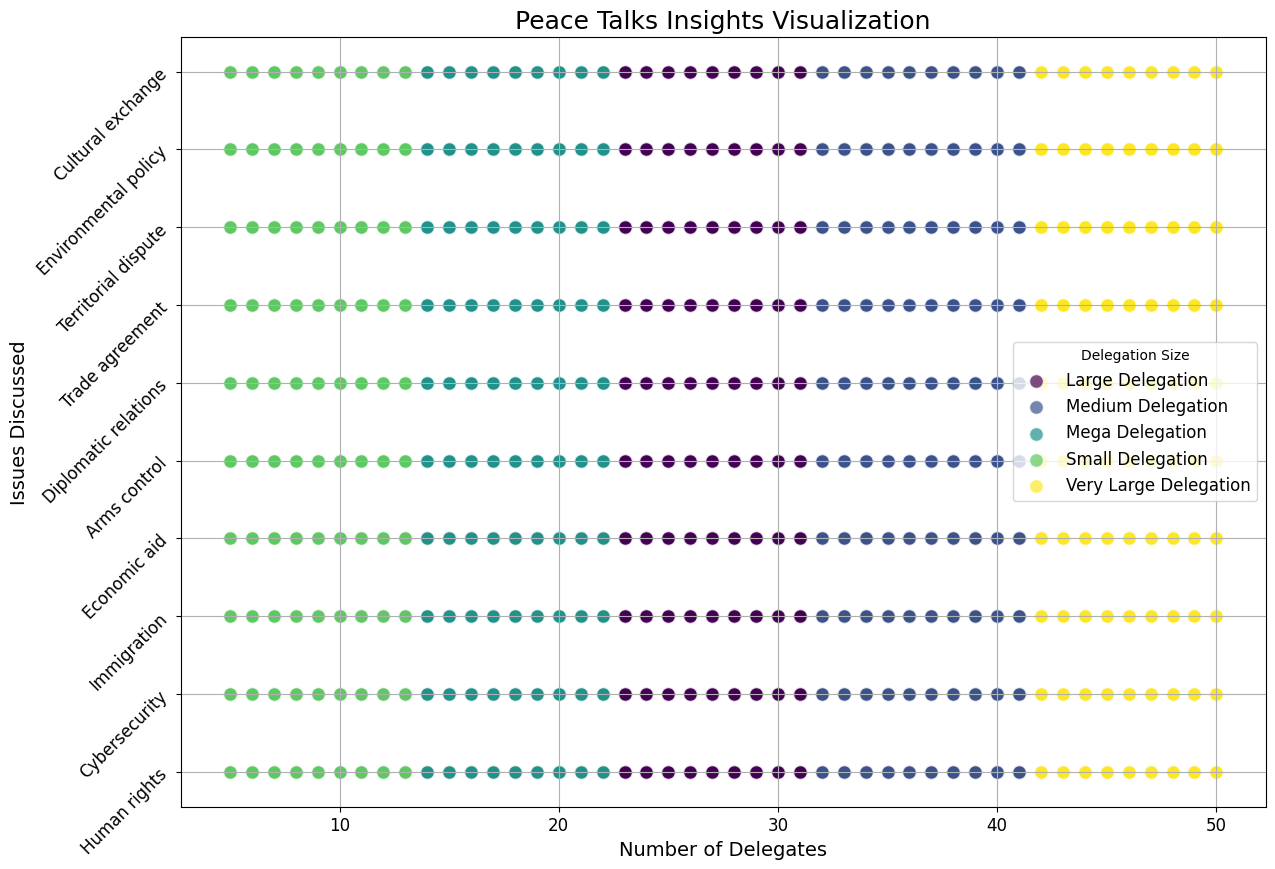

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def visualize_peace_talks(data):
    df = pd.DataFrame(data)
    plt.figure(figsize=(14, 10))

    # Create a numeric representation for 'issues'
    df['issue_id'] = df['issue'].astype('category').cat.codes

    # Using a colormap for the clusters
    cmap = plt.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, len(df['cluster_name'].unique())))

    # Correcting the for loop for grouping
    for i, (name, group) in enumerate(df.groupby('cluster_name')):
        plt.scatter(group['delegates'], group['issue_id'], color=colors[i], alpha=0.7, label=name, edgecolors='w', s=100)

    plt.title('Peace Talks Insights Visualization', fontsize=18)
    plt.xlabel('Number of Delegates', fontsize=14)
    plt.ylabel('Issues Discussed', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(ticks=range(len(df['issue'].unique())), labels=df['issue'].unique(), fontsize=12, rotation=45)
    plt.grid(True)
    plt.legend(title='Delegation Size', fontsize=12)
    plt.show()

visualize_peace_talks(analyzed_data)




In [ ]:
#Importing libraries and connecting to mongodb
# Import necessary libraries
!pip install pymongo
import pymongo
from pymongo import MongoClient
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import random

# Install packages (Only needed in a Jupyter notebook or similar environment)
!pip install pymongo scikit-learn pandas matplotlib

# Define a function to get cultural data from MongoDB
def get_cultural_data():
    try:
        # Connect to MongoDB server
        client = MongoClient('mongodb://localhost:27017/', serverSelectionTimeoutMS=5000)
        client.server_info()  # Check the connection

        # Access specific database and collection
        db = client.cultural_data
        collection = db.cultural_info

        # Retrieve and return data
        data = list(collection.find())
        return data

    except pymongo.errors.ServerSelectionTimeoutError as e:
        print("MongoDB connection failed. Check if MongoDB is running. Error:", e)
        return None
    except Exception as e:
        print("Error occurred:", e)
        return None

# Retrieve cultural data
cultural_data = get_cultural_data()
if cultural_data:
    print("Data retrieved successfully.")
else:
    print("Failed to retrieve data.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 27.0 MB/s eta 0:00:00
MongoDB connection failed. Check if MongoDB is running. Error: localhost:27017: [Errno 111] Connection refused (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms), Timeout: 5.0s, Topology Description: <TopologyDescription id: 65a5a53ad482ad5ea16c697e, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [Errno 111] Connection refused (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')>]>
Failed to retrieve data.


In [ ]:
def analyze_cultural_patterns(data, n_clusters=5):
    if not data or len(data) == 0:
        print("No data provided or data is empty.")
        return None

    df = pd.DataFrame(data)

    # Check and add missing columns for Hofstede's dimensions and other expected columns
    expected_columns = ['country', 'issue', 'location', 'individualism', 'power_distance',
                        'masculinity', 'uncertainty_avoidance', 'long_term_orientation', 'indulgence']
    for col in expected_columns:
        if col not in df.columns:
            df[col] = 0  # Assuming default value as 0, adjust as needed

    # One-hot encoding for categorical columns
    categorical_columns = ['country', 'issue', 'location']
    df = pd.get_dummies(df, columns=categorical_columns)

    # Check if DataFrame has enough samples for clustering
    if df.shape[0] < n_clusters:
        print(f"Not enough samples for clustering. Need at least {n_clusters}, but got {df.shape[0]}.")
        return None

    # Perform KMeans clustering
    model = KMeans(n_clusters=n_clusters, n_init=10)
    model.fit(df)
    df['cluster'] = model.labels_

    return df

# Example usage
analyzed_data = analyze_cultural_patterns(cultural_data)
if analyzed_data is not None:
    print("Analysis completed successfully.")
else:
    print("Analysis failed due to insufficient data.")



No data provided or data is empty.
Analysis failed due to insufficient data.


In [ ]:
def analyze_cultural_patterns(data, n_clusters=5):
    if not data or len(data) == 0:
        print("No data provided or data is empty.")
        return None

    df = pd.DataFrame(data)

    # Check and add missing columns for Hofstede's dimensions and other expected columns
    expected_columns = ['country', 'issue', 'location', 'individualism', 'power_distance',
                        'masculinity', 'uncertainty_avoidance', 'long term_orientation', 'indulgence']
    for col in expected_columns:
        if col not in df.columns:
            df[col] = 0  # Assuming default value as 0, adjust as needed

    # One-hot encoding for categorical columns
    categorical_columns = ['country', 'issue', 'location']
    df = pd.get_dummies(df, columns=categorical_columns)

    # Check if DataFrame has enough samples for clustering
    if df.shape[0] < n_clusters:
        print(f"Not enough samples for clustering. Need at least {n_clusters}, but got {df.shape[0]}.")
        return None

    # Perform KMeans clustering
    model = KMeans(n_clusters=n_clusters, n_init=10)
    model.fit(df)
    df['cluster'] = model.labels_  # Ensuring 'cluster' column is created

    return df

# Example usage
analyzed_data = analyze_cultural_patterns(cultural_data)
if analyzed_data is not None:
    print("Analysis completed successfully.")
else:
    print("Analysis failed due to insufficient data.")



No data provided or data is empty.
Analysis failed due to insufficient data.


In [ ]:
# Simulate MongoDB database for testing
def simulate_mongo_db(data):
    return {'cultural_info': data}

# Function to retrieve cultural data from simulated DB
def get_cultural_data(db):
    try:
        data = db['cultural_info']
        return data
    except Exception as e:
        print("Error:", e)
        return None

# Generate simulated dataset for testing
def generate_peace_talks_data(num_points=100):
    countries = ['Country A', 'Country B', 'Country C', 'Country D', 'Country E']
    issues = ['Territorial dispute', 'Trade agreement', 'Environmental policy']
    locations = ['City A', 'City B', 'City C', 'City D', 'City E']
    peace_talks_data = []
    for _ in range(num_points):
        data_point = {
            'country': random.choice(countries),
            'issue': random.choice(issues),
            'delegates': random.randint(5, 50),
            'location': random.choice(locations),
            # Simulate values for Hofstede's dimensions
            'individualism': random.randint(0, 100),
            'power_distance': random.randint(0, 100),
            # Add other Hofstede's dimensions as needed
        }
        peace_talks_data.append(data_point)
    return peace_talks_data

# Use simulated data for testing
simulated_db = simulate_mongo_db(generate_peace_talks_data(100))
cultural_data = get_cultural_data(simulated_db)
analyzed_data = analyze_cultural_patterns(cultural_data) if cultural_data else None


In [ ]:
def generate_peace_talks_data(num_points=100):
    countries = ['Country A', 'Country B', 'Country C', 'Country D', 'Country E']
    issues = ['Territorial dispute', 'Trade agreement', 'Environmental policy']
    locations = ['City A', 'City B', 'City C', 'City D', 'City E']
    peace_talks_data = []
    for _ in range(num_points):
        data_point = {
            'country': random.choice(countries),
            'issue': random.choice(issues),
            'delegates': random.randint(5, 50),
            'location': random.choice(locations),
            'individualism': random.randint(0, 100),
            'power_distance': random.randint(0, 100),
            'masculinity': random.randint(0, 100),
            'uncertainty_avoidance': random.randint(0, 100),
            'long_term_orientation': random.randint(0, 100),  # Ensure this line is included
            'indulgence': random.randint(0, 100)
        }
        peace_talks_data.append(data_point)
    return peace_talks_data


In [ ]:
import matplotlib.pyplot as plt
import itertools

# Function to visualize clusters across all Hofstede's dimensions
def visualize_all_hofstede_dimensions(data):
    if data is None or data.empty:
        print("No data to visualize.")
        return

    # List all Hofstede's dimensions
    dimensions = ['individualism', 'power_distance', 'masculinity', 'uncertainty_avoidance',
                  'long_term_orientation', 'indulgence']

    # Check if all dimensions exist in the data
    missing_dimensions = [dim for dim in dimensions if dim not in data.columns]
    if missing_dimensions:
        print(f"Missing dimensions in the data: {missing_dimensions}")
        return

    # Generate all unique pairs of dimensions
    dimension_pairs = list(itertools.combinations(dimensions, 2))

    # Set up the matplotlib figure
    n = len(dimension_pairs)
    fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(8, 5 * n))

    # Plot each pair of dimensions
    for i, (dim1, dim2) in enumerate(dimension_pairs):
        ax = axes[i] if n > 1 else axes
        sc = ax.scatter(data[dim1], data[dim2], c=data['cluster'], cmap='viridis', alpha=0.5)
        ax.set_xlabel(dim1.capitalize())
        ax.set_ylabel(dim2.capitalize())
        ax.set_title(f"Cluster Visualization: {dim1.capitalize()} vs {dim2.capitalize()}")

    # Add a color bar
    fig.colorbar(sc, ax=axes.ravel().tolist(), orientation='vertical', label='Cluster')
    plt.tight_layout()
    plt.show()


<Figure size 640x480 with 0 Axes>

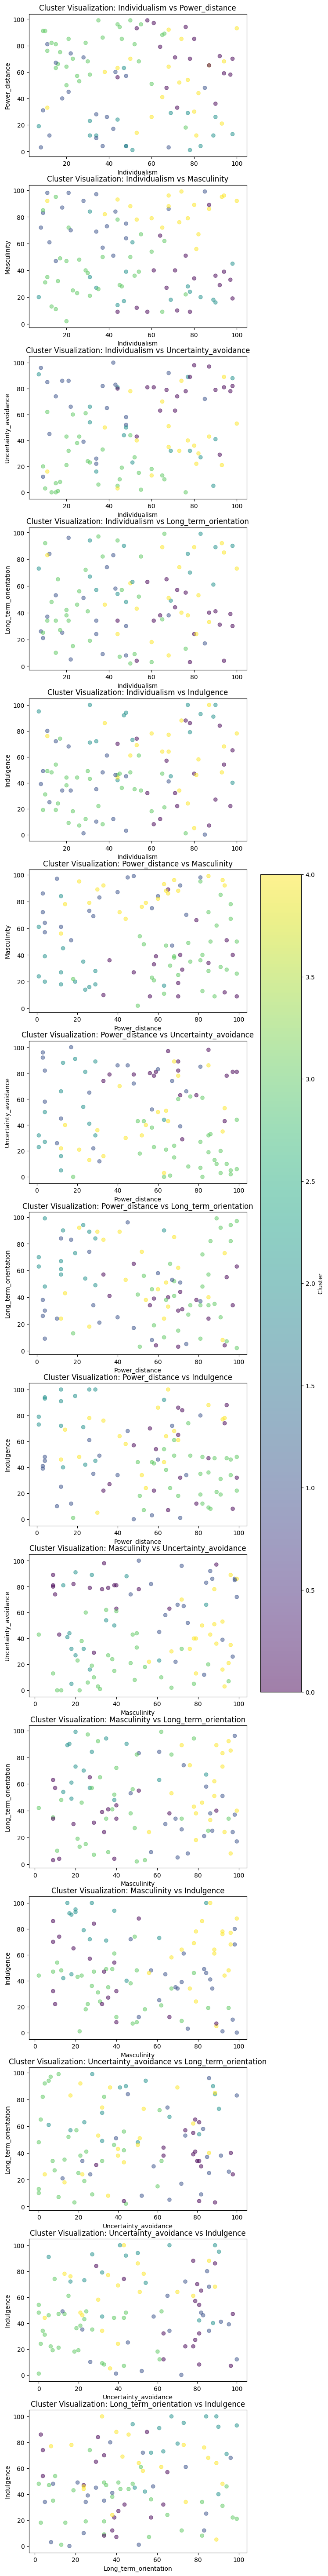

In [ ]:
# Generate and analyze data
simulated_db = simulate_mongo_db(generate_peace_talks_data(100))
cultural_data = get_cultural_data(simulated_db)
analyzed_data = analyze_cultural_patterns(cultural_data) if cultural_data else None

# Visualize the clusters across all Hofstede's dimensions
visualize_all_hofstede_dimensions(analyzed_data)